In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('seattle-weather.xls')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [4]:
#检查 Pandas DataFrame 中重复行的数量
df.duplicated().sum() 

0

In [5]:
#column Open converted into numpy array
training_set = df.iloc[:,2:3].values
training_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

In [6]:
len(training_set)
amp = max(training_set)
print(amp)

[35.6]


In [7]:
training_set =training_set/amp
training_set


array([[0.35955056],
       [0.29775281],
       [0.32865169],
       ...,
       [0.20224719],
       [0.15730337],
       [0.15730337]])

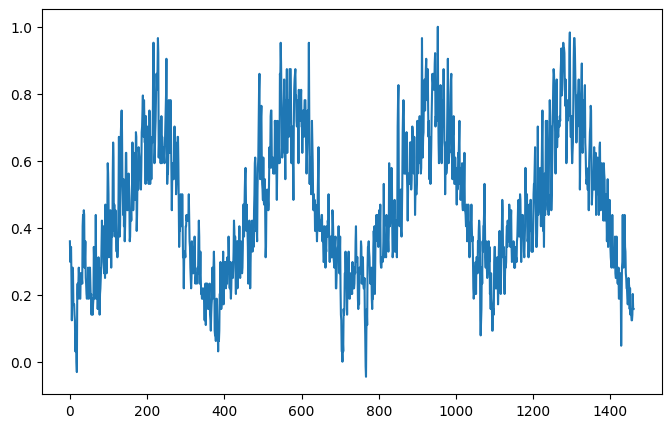

In [8]:
fig1=plt.figure(figsize=(8,5))
plt.plot(training_set)

In [9]:
#通过滑动窗口的方式提取连续的时间段作为特征，并使用该时间段的下一个值作为预测目标
def df_to_XY(df,window_size=10):
 X_train=[]
 y_train=[]

 for i in range(10,len(training_set)):
    X_train.append(training_set[i-10:i,0])
    y_train.append(training_set[i,0])
    
 X_train, y_train = np.array(X_train), np.array(y_train)
 return X_train, y_train

In [10]:
WINDOW = 10
X,y = df_to_XY(df,WINDOW)

print(len(X),len(y))
print(X[0],X[1])


1451 1451
[0.35955056 0.29775281 0.32865169 0.34269663 0.25       0.12359551
 0.20224719 0.28089888 0.26404494 0.17134831] [0.29775281 0.32865169 0.34269663 0.25       0.12359551 0.20224719
 0.28089888 0.26404494 0.17134831 0.17134831]


In [11]:
#调整为三维的形状，以适应某些模型（如 RNN/LSTM/GRU）的输入要求
X_train = np.reshape(X,(X.shape[0],X.shape[1],1))
X_train = X[:1000]
y_train = y[:1000]

X_test = X[1000:]
y_test = y[1000:]

In [12]:
print(X_train.shape)

(1000, 10)


In [13]:
#Building the RNN
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,SimpleRNN

In [14]:
#Addinf the first LSTM layer and some Dropout regularisation
model = Sequential()

model.add(SimpleRNN(units=5,input_shape=(WINDOW,1),activation='relu'))

#Output layer
model.add(Dense(units=1,activation="linear"))

model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5)                 35        
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


2024-10-15 10:03:21.393193: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-15 10:03:21.416614: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-15 10:03:21.416735: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-15 10:03:21.417531: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [16]:
#fitting the rnn to the training set
history=model.fit(X_train,y_train,epochs=100, batch_size=32 ,validation_split=0.2)

Epoch 1/100
21/25 [========================>.....] - ETA: 0s - loss: 0.7099 

2024-10-15 10:03:22.944919: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


25/25 [==============================] - 1s 11ms/step - loss: 0.7054 - val_loss: 1.1718
Epoch 2/100
25/25 [==============================] - 0s 9ms/step - loss: 0.5989 - val_loss: 1.0197
Epoch 3/100
25/25 [==============================] - 0s 10ms/step - loss: 0.5119 - val_loss: 0.8945
Epoch 4/100
25/25 [==============================] - 0s 10ms/step - loss: 0.4414 - val_loss: 0.7875
Epoch 5/100
25/25 [==============================] - 0s 10ms/step - loss: 0.3824 - val_loss: 0.6969
Epoch 6/100
25/25 [==============================] - 0s 10ms/step - loss: 0.3330 - val_loss: 0.6202
Epoch 7/100
25/25 [==============================] - 0s 10ms/step - loss: 0.2914 - val_loss: 0.5548
Epoch 8/100
25/25 [==============================] - 0s 10ms/step - loss: 0.2567 - val_loss: 0.4971
Epoch 9/100
25/25 [==============================] - 0s 9ms/step - loss: 0.2269 - val_loss: 0.4472
Epoch 10/100
25/25 [==============================] - 0s 9ms/step - loss: 0.2015 - val_loss: 0.4038
Epoch 11/100
2

In [17]:

his = pd.DataFrame(history.history)

In [18]:

his.head()

,loss,val_loss
0,0.705381,1.171797
1,0.598857,1.019666
2,0.511914,0.894542
3,0.441358,0.787542
4,0.382395,0.696939


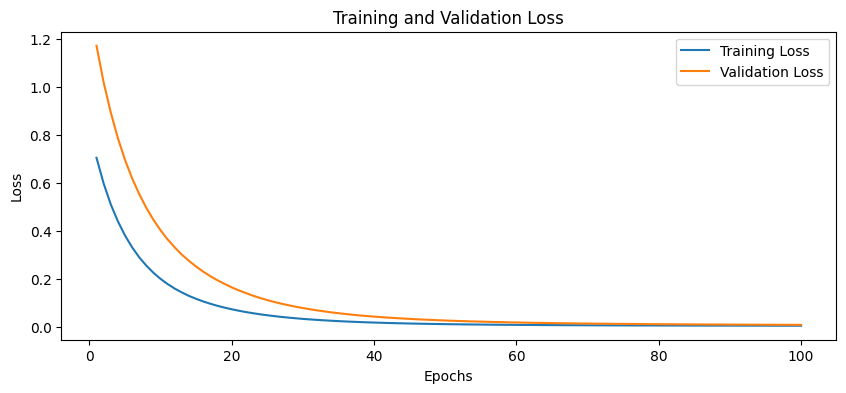

In [19]:
# 提取训练损失和验证损失
history_loss = history.history['loss']
history_val_loss = history.history['val_loss']

# 创建一个 x 轴数据，即 epoch 序号
epochs = range(1, len(history_loss) + 1)

# 创建图形
plt.figure(figsize=(10, 4))

# 绘制训练损失曲线
plt.plot(epochs, history_loss, label='Training Loss')

# 绘制验证损失曲线
plt.plot(epochs, history_val_loss, label='Validation Loss')

# 图形标题和标签
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 显示图形
plt.show()


In [20]:

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [21]:
train_pred=train_pred*amp
test_pred=test_pred*amp

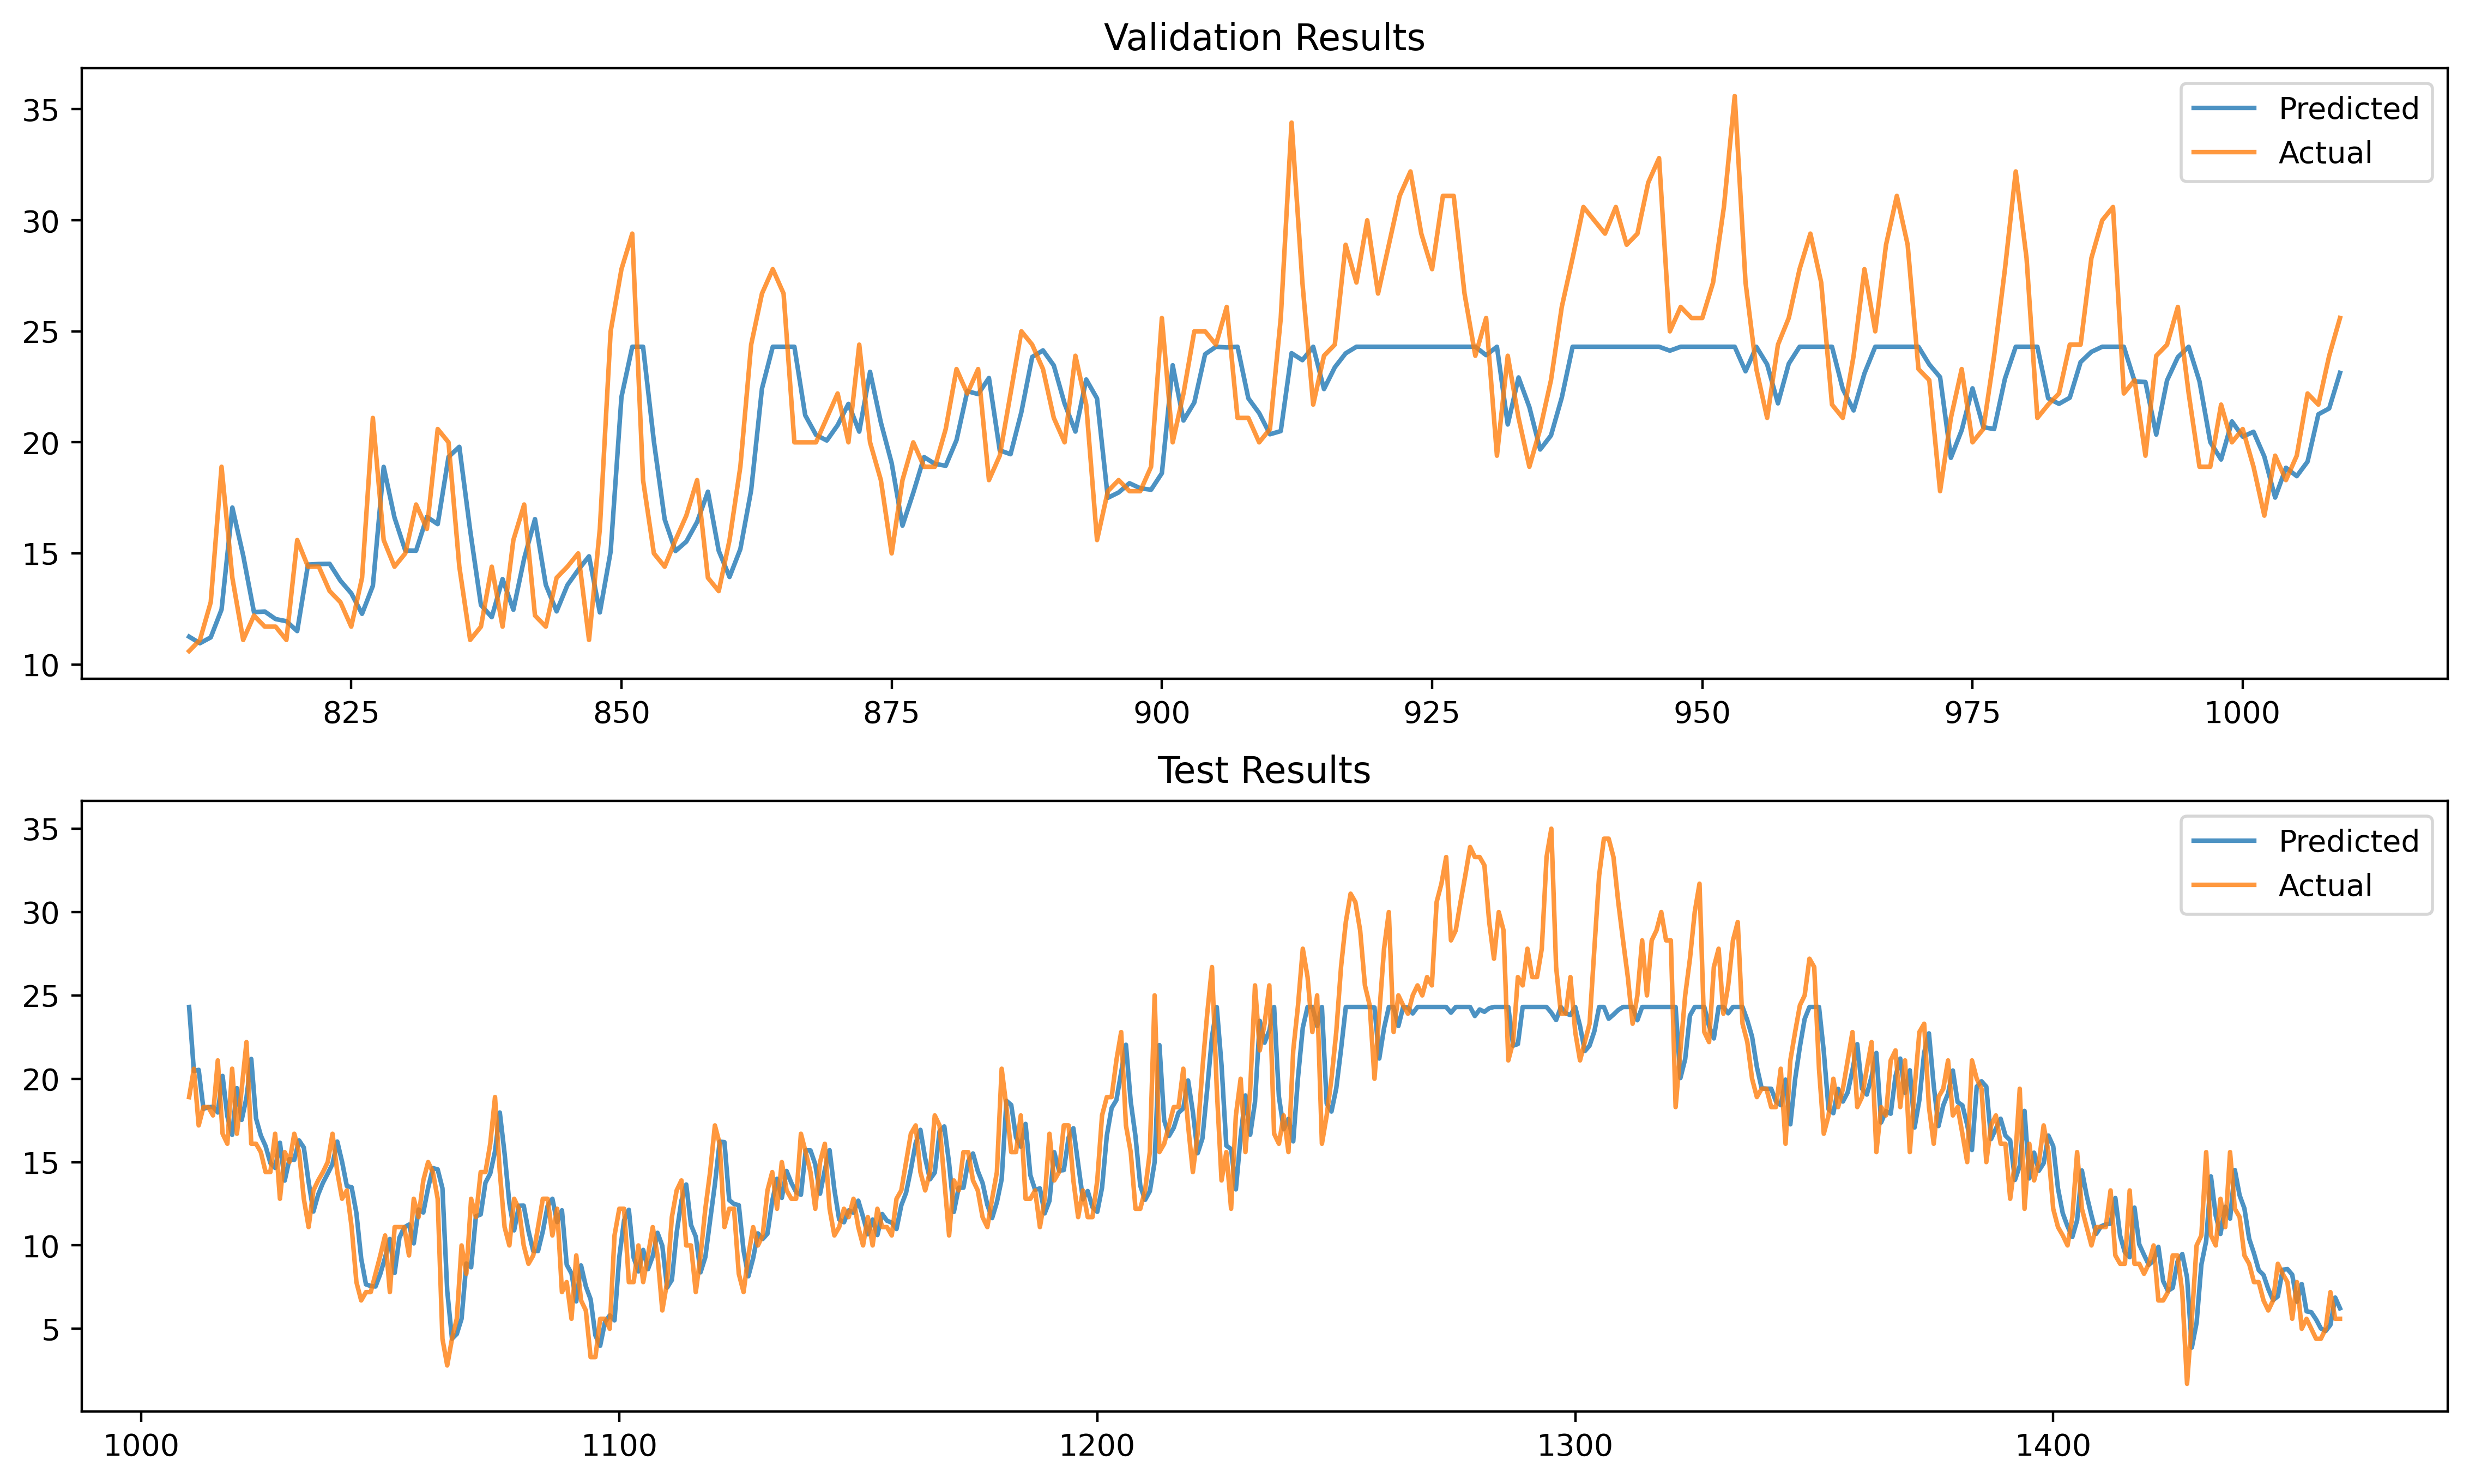

In [22]:
pred = np.concatenate([train_pred,test_pred])
df_pred = pd.DataFrame(df["temp_max"].copy())
df_pred.columns=["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred

fig,axes = plt.subplots(2,1,figsize=(14,8),dpi=400)

plt.subplot(2,1,1)
plt.title("Validation Results")
plt.plot(df_pred['predicted'][800:1000], label='Predicted',alpha=0.8,linestyle=None)
plt.plot(df_pred['actual'][800:1000], label='Actual',alpha=0.8,linestyle=None)
plt.legend()
plt.subplot(2,1,2)
plt.title("Test Results")
plt.plot(df_pred['predicted'][1000:], label='Predicted',alpha=0.8,linestyle=None)
plt.plot(df_pred['actual'][1000:], label='Actual',alpha=0.8,linestyle=None)
plt.legend()